In [32]:
from tweedejaars_project import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

df = load_df()
df


,datetime,import_capacity,upward_dispatch_published,downward_dispatch_published,min_price_published,mid_price_published,max_price_published,minute_in_ptu,min_ptu_price_known,max_ptu_price_known,...,forecast_solar,forecast_demand,ptu_id,target_two_sided_ptu_alt,target_two_sided_ptu_realtime,target_two_sided_ptu_flip,fix_two_sided_ptu,fix_two_sided_ptu_alt,fix_two_sided_ptu_realtime,fix_two_sided_ptu_flip
0,2023-12-29 00:00:00+00:00,65.4,0.0,0.0,0.00,0.00,0.00,0,NaN,NaN,...,0.0,10927.409665,0,True,True,True,False,True,True,True
1,2023-12-29 00:01:00+00:00,65.4,0.0,0.0,0.00,0.00,0.00,1,NaN,NaN,...,0.0,10927.409665,0,True,False,False,False,True,False,False
2,2023-12-29 00:02:00+00:00,65.4,0.0,79.0,-8.81,33.59,NaN,2,-8.81,NaN,...,0.0,10927.409665,0,True,False,False,True,True,False,False
3,2023-12-29 00:03:00+00:00,65.4,0.0,61.0,-8.81,33.59,NaN,3,-8.81,NaN,...,0.0,10927.409665,0,True,False,False,True,True,False,False
4,2023-12-29 00:04:00+00:00,65.4,0.0,43.0,-8.81,33.59,NaN,4,-8.81,NaN,...,0.0,10927.409665,0,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220241,2024-05-29 22:41:00+00:00,1982.6,167.0,0.0,NaN,80.12,96.92,11,NaN,101.22,...,0.0,11649.839443,14682,False,False,False,False,False,False,False
220242,2024-05-29 22:42:00+00:00,1982.6,165.0,0.0,NaN,80.12,96.92,12,NaN,101.22,...,0.0,11649.839443,14682,False,False,False,False,False,False,False
220243,2024-05-29 22:43:00+00:00,1982.6,162.0,0.0,NaN,80.12,96.87,13,NaN,101.22,...,0.0,11649.839443,14682,False,False,False,False,False,False,False
220244,2024-05-29 22:44:00+00:00,1982.6,158.0,0.0,NaN,80.12,96.87,14,NaN,101.22,...,0.0,11649.839443,14682,False,False,False,False,False,False,False


In [45]:
l = 24
d = 60
data = pd.Series(np.array(df['forecast_solar'][2:d*l:d]), index=df['datetime'][2:d*l:d])
# print(data)


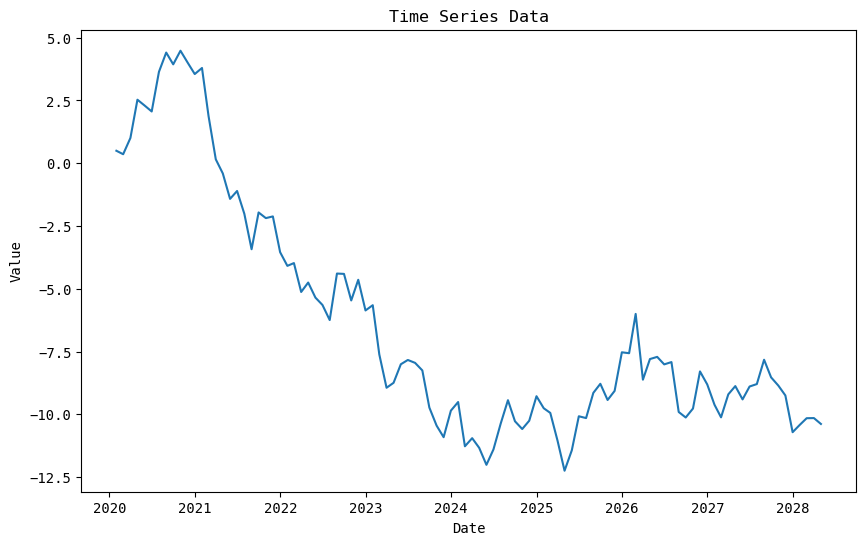

ADF Statistic: -1.3583317659818992
p-value: 0.6020814791099098
Critical Value (1%): -3.498198082189098
Critical Value (5%): -2.891208211860468
Critical Value (10%): -2.5825959973472097
ADF Statistic after differencing: -10.008881137130237
p-value after differencing: 1.800687720719554e-17
Critical Value (1%): -3.4989097606014496
Critical Value (5%): -2.891516256916761
Critical Value (10%): -2.5827604414827157


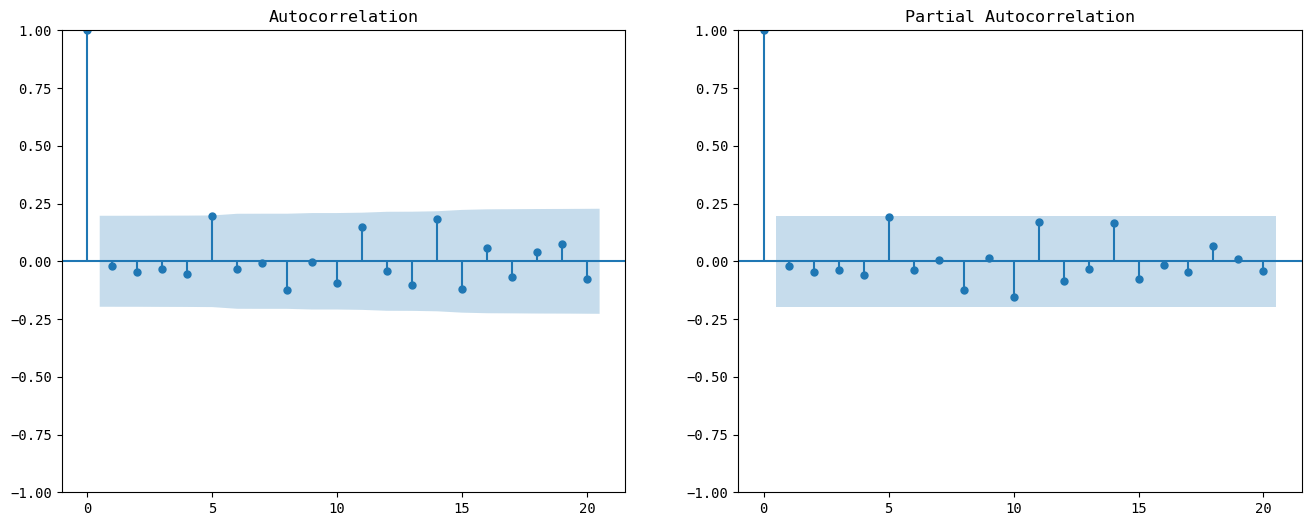

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -128.455
Date:                 ma, 17 jun 2024   AIC                            272.909
Time:                        13:30:12   BIC                            293.670
Sample:                    01-31-2020   HQIC                           281.309
                         - 04-30-2028                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2951      0.611     -0.483      0.629      -1.494       0.903
ar.L2          0.2930      0.594      0.494      0.622      -0.871       1.457
ar.L3         -0.0204      0.124     -0.165      0.8

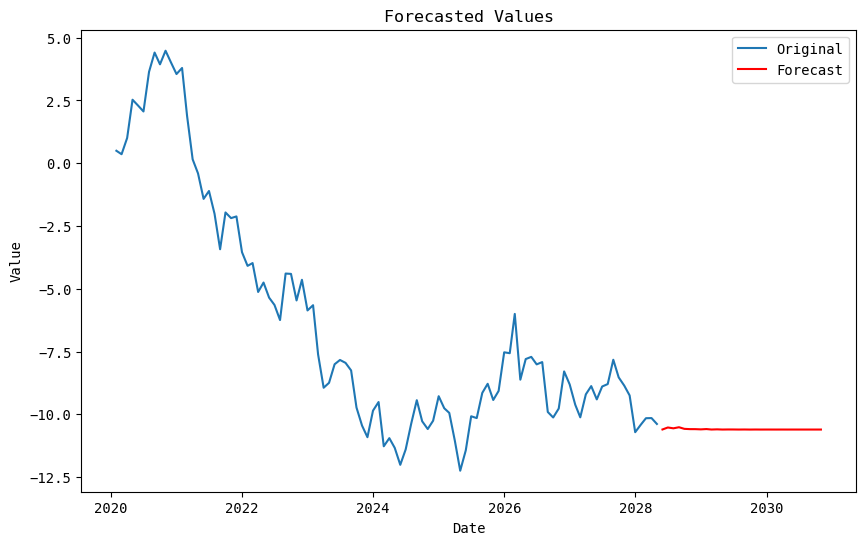

In [56]:
# Step 1: Load the data (Here, we'll generate synthetic data)
# Uncomment and modify the following line if you have your own dataset
# df = pd.read_csv('your_dataset.csv', parse_dates=['Date'], index_col='Date')

# Generate synthetic data
np.random.seed(42)
date_range = pd.date_range(start='1/1/2020', periods=100, freq='ME')
data = pd.Series(np.random.randn(100).cumsum(), index=date_range)


# Step 2: Visualize the time series
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# Step 3: Perform stationarity test (ADF Test)
result = adfuller(data)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

# Step 4: Differencing the series (if needed) to make it stationary
data_diff = data.diff().dropna()
result_diff = adfuller(data_diff)
print('ADF Statistic after differencing:', result_diff[0])
print('p-value after differencing:', result_diff[1])
for key, value in result_diff[4].items():
    print(f'Critical Value ({key}): {value}')

# Step 5: Identify the best parameters (p, d, q) for the ARIMA model using ACF and PACF plots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(data_diff, ax=ax[0])
plot_pacf(data_diff, ax=ax[1])
plt.show()

# Step 6: Fit the ARIMA model
p, d, q = 5,1,2  # These parameters are usually determined from ACF and PACF plots
model = ARIMA(data, order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

# Step 7: Evaluate the model
data_forecast = model_fit.fittedvalues
mse = mean_squared_error(data[d:], data_forecast[d:])
print('Mean Squared Error:', mse)

# Step 8: Forecast future values
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq='ME')[1:]
forecast_series = pd.Series(forecast, index=forecast_index)

# Visualize the forecast
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.title('Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()
